In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

In [157]:
ds=pd.read_csv(r"C:\Users\shobhit.saxena\Music\Python_New\Projects\sonar.all-data.csv")

In [158]:
ds.shape

(208, 61)

In [159]:
####Since the headers in hte original file were blank, I have introduced new headers into the dataset with A1,A2,A3,A4....A60 and the output variable as O
ds.columns


Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21',
       'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31',
       'A32', 'A33', 'A34', 'A35', 'A36', 'A37', 'A38', 'A39', 'A40', 'A41',
       'A42', 'A43', 'A44', 'A45', 'A46', 'A47', 'A48', 'A49', 'A50', 'A51',
       'A52', 'A53', 'A54', 'A55', 'A56', 'A57', 'A58', 'A59', 'A60', 'O'],
      dtype='object')

In [160]:
ds.dtypes

A1     float64
A2     float64
A3     float64
A4     float64
A5     float64
A6     float64
A7     float64
A8     float64
A9     float64
A10    float64
A11    float64
A12    float64
A13    float64
A14    float64
A15    float64
A16    float64
A17    float64
A18    float64
A19    float64
A20    float64
A21    float64
A22    float64
A23    float64
A24    float64
A25    float64
A26    float64
A27    float64
A28    float64
A29    float64
A30    float64
        ...   
A32    float64
A33    float64
A34    float64
A35    float64
A36    float64
A37    float64
A38    float64
A39    float64
A40    float64
A41    float64
A42    float64
A43    float64
A44    float64
A45    float64
A46    float64
A47    float64
A48    float64
A49    float64
A50    float64
A51    float64
A52    float64
A53    float64
A54    float64
A55    float64
A56    float64
A57    float64
A58    float64
A59    float64
A60    float64
O       object
Length: 61, dtype: object

In [161]:
ds['O']

0      R
1      R
2      R
3      R
4      R
5      R
6      R
7      R
8      R
9      R
10     R
11     R
12     R
13     R
14     R
15     R
16     R
17     R
18     R
19     R
20     R
21     R
22     R
23     R
24     R
25     R
26     R
27     R
28     R
29     R
      ..
178    M
179    M
180    M
181    M
182    M
183    M
184    M
185    M
186    M
187    M
188    M
189    M
190    M
191    M
192    M
193    M
194    M
195    M
196    M
197    M
198    M
199    M
200    M
201    M
202    M
203    M
204    M
205    M
206    M
207    M
Name: O, Length: 208, dtype: object

In [162]:
ds.isnull().sum()

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
A17    0
A18    0
A19    0
A20    0
A21    0
A22    0
A23    0
A24    0
A25    0
A26    0
A27    0
A28    0
A29    0
A30    0
      ..
A32    0
A33    0
A34    0
A35    0
A36    0
A37    0
A38    0
A39    0
A40    0
A41    0
A42    0
A43    0
A44    0
A45    0
A46    0
A47    0
A48    0
A49    0
A50    0
A51    0
A52    0
A53    0
A54    0
A55    0
A56    0
A57    0
A58    0
A59    0
A60    0
O      0
Length: 61, dtype: int64

In [163]:
ds['A31'].isnull().sum()

0

In [164]:
ds.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A51,A52,A53,A54,A55,A56,A57,A58,A59,A60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


{'whiskers': [<matplotlib.lines.Line2D at 0x990bef0>,
 'caps': [<matplotlib.lines.Line2D at 0x9917c88>,
 'boxes': [<matplotlib.lines.Line2D at 0x9917240>],
 'medians': [<matplotlib.lines.Line2D at 0xdffa358>],
 'fliers': [<matplotlib.lines.Line2D at 0xdffa6a0>],
 'means': []}

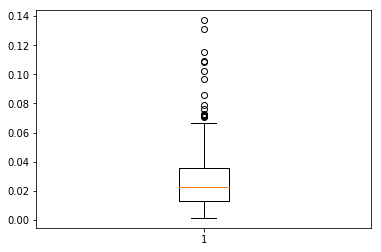

In [165]:
plt.boxplot(ds['A1'])

{'whiskers': [<matplotlib.lines.Line2D at 0xe040e80>,
 'caps': [<matplotlib.lines.Line2D at 0xe048c18>,
 'boxes': [<matplotlib.lines.Line2D at 0xe0481d0>],
 'medians': [<matplotlib.lines.Line2D at 0xe0532e8>],
 'fliers': [<matplotlib.lines.Line2D at 0xe053630>],
 'means': []}

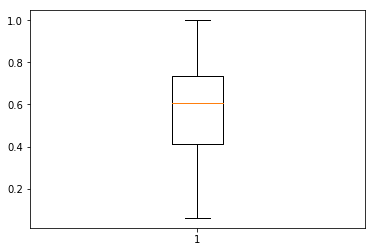

In [166]:
plt.boxplot(ds['A30'])

{'whiskers': [<matplotlib.lines.Line2D at 0xe09b7b8>,
 'caps': [<matplotlib.lines.Line2D at 0xe09be48>,
 'boxes': [<matplotlib.lines.Line2D at 0xe09b400>],
 'medians': [<matplotlib.lines.Line2D at 0xe0a4518>],
 'fliers': [<matplotlib.lines.Line2D at 0xe0a4860>],
 'means': []}

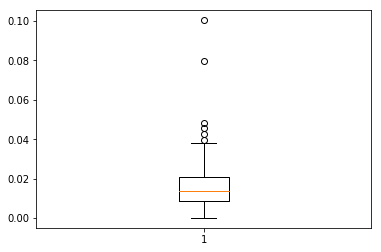

In [167]:
plt.boxplot(ds['A51'])

{'whiskers': [<matplotlib.lines.Line2D at 0xe0ece80>,
 'caps': [<matplotlib.lines.Line2D at 0xe0f8550>,
 'boxes': [<matplotlib.lines.Line2D at 0xe0ecac8>],
 'medians': [<matplotlib.lines.Line2D at 0xe0f8be0>],
 'fliers': [<matplotlib.lines.Line2D at 0xe0f8f28>],
 'means': []}

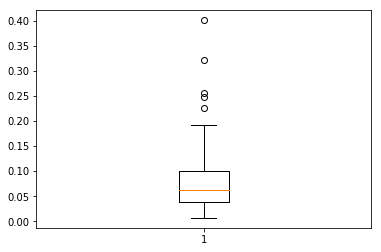

In [168]:
plt.boxplot(ds['A5'])

In [169]:
from scipy.stats import zscore
z=np.abs(zscore(ds.iloc[:,0:-1]))
z

array([[0.39955135, 0.04064823, 0.02692565, ..., 0.06987027, 0.17167808,
        0.65894689],
       [0.70353822, 0.42163039, 1.05561832, ..., 0.47240644, 0.44455424,
        0.41985233],
       [0.12922901, 0.60106749, 1.72340448, ..., 1.30935987, 0.25276128,
        0.25758223],
       ...,
       [1.00438083, 0.16007801, 0.67384349, ..., 0.90652575, 0.03913824,
        0.67887143],
       [0.04953255, 0.09539176, 0.13480381, ..., 0.00759783, 0.70402047,
        0.34015415],
       [0.13794908, 0.06497869, 0.78861924, ..., 0.6738235 , 0.29860448,
        0.99479044]])

In [170]:
treshold=3
print(np.where(z>3))

(array([  2,   2,   2,   2,   2,   3,   3,   5,   5,  19,  19,  20,  21,
        22,  22,  22,  22,  22,  22,  22,  22,  33,  44,  44,  44,  65,
        85,  85,  87,  91,  91,  97,  97,  98,  98,  98,  98,  98,  98,
       101, 101, 105, 111, 111, 111, 112, 127, 127, 127, 129, 129, 129,
       131, 132, 132, 133, 133, 133, 134, 134, 134, 134, 135, 135, 135,
       135, 136, 136, 136, 136, 137, 137, 138, 138, 138, 140, 140, 140,
       140, 140, 141, 141, 142, 142, 142, 143, 143, 143, 144, 145, 145,
       146, 146, 146, 146, 146, 146, 146, 146, 146, 147, 147, 147, 147,
       147, 147, 147, 147, 161, 184, 186, 186, 186], dtype=int64), array([ 8,  9, 10, 11, 56, 38, 39, 13, 14,  4,  7,  5, 37, 38, 39, 40, 41,
       46, 47, 48, 49, 49, 39, 42, 43, 58,  1,  2, 56,  5,  6, 58, 59,  0,
        1,  2,  3,  4, 59, 12, 57, 55,  2,  3,  4, 57, 13, 54, 57,  0, 12,
       53,  0,  7,  8,  8,  9, 52,  0,  6,  7,  8,  7,  8, 53, 55,  0,  7,
        8, 51,  9, 10,  2, 47, 51, 45, 46, 48, 49, 50, 4

In [171]:
z[2][8]

3.2327671116628496

In [172]:
z[2][9]

3.0661053077656346

In [173]:
z[186][45]

3.216457267849575

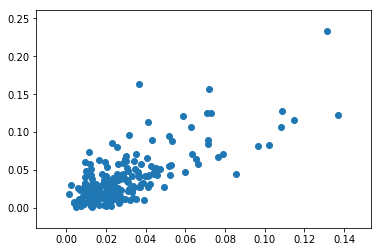

In [174]:
plt.scatter(ds['A1'],ds['A2'])

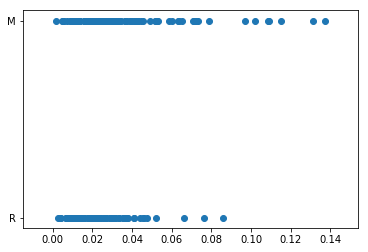

In [175]:
plt.scatter(ds['A1'],ds['O'])

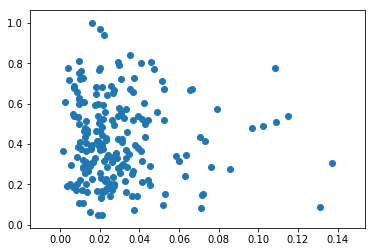

In [176]:
plt.scatter(ds['A1'],ds['A33'])

In [177]:
#######Since the target variable is categrical we are not checking the correlation coefficients with the target variable and only removing the outliers for the dataset

In [178]:
ds_new=ds[(z<3).all(axis=1)]

In [179]:
ds.shape

(208, 61)

In [180]:
ds_new.shape

(168, 61)

In [181]:
lg=LogisticRegression()

In [182]:
x=ds_new.iloc[:,0:-1]
y=ds_new.iloc[:,-1]

In [183]:
from sklearn.decomposition import PCA

In [184]:
##pca=PCA(n_components=20) ####### Using Principal Component analysis to reduce the no. of variables to be used for analysis.
##x=pca.fit_transform(x) #####since we were not getting good accuracy using PCA, we are not using it.

In [185]:
x.shape

(168, 60)

In [186]:
y.shape

(168,)

In [187]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=63)

In [188]:
x_train.shape

(112, 60)

In [189]:
y_train.shape

(112,)

In [190]:
y_test.shape

(56,)

In [191]:
x_test.shape

(56, 60)

In [192]:
lg.fit(x_train,y_train)

C:\Users\shobhit.saxena\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [193]:
lg.predict(x_test)

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'R', 'M', 'R', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'R', 'M', 'R', 'R', 'R', 'R', 'M',
       'M', 'R', 'R', 'R', 'M', 'R', 'M', 'M', 'M', 'M', 'R', 'R', 'M',
       'R', 'M', 'R', 'R', 'M', 'R', 'R', 'R', 'R', 'M', 'M', 'R', 'M',
       'R', 'M', 'M', 'R'], dtype=object)

In [194]:
pred=lg.predict(x_test)

In [195]:
print(pred)

['M' 'M' 'M' 'M' 'M' 'M' 'M' 'R' 'M' 'R' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'R' 'M' 'R' 'R' 'R' 'R' 'M' 'M' 'R' 'R' 'R' 'M' 'R' 'M' 'M' 'M' 'M'
 'R' 'R' 'M' 'R' 'M' 'R' 'R' 'M' 'R' 'R' 'R' 'R' 'M' 'M' 'R' 'M' 'R' 'M'
 'M' 'R']


In [196]:
print("Predicted Pattern", pred)
print("Actual Pattern", y_test)

Predicted Pattern ['M' 'M' 'M' 'M' 'M' 'M' 'M' 'R' 'M' 'R' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'R' 'M' 'R' 'R' 'R' 'R' 'M' 'M' 'R' 'R' 'R' 'M' 'R' 'M' 'M' 'M' 'M'
 'R' 'R' 'M' 'R' 'M' 'R' 'R' 'M' 'R' 'R' 'R' 'R' 'M' 'M' 'R' 'M' 'R' 'M'
 'M' 'R']
Actual Pattern 110    M
171    M
103    M
79     R
189    M
1      R
109    M
54     R
126    M
13     R
194    M
202    M
102    M
203    M
83     R
191    M
164    M
197    M
176    M
92     R
204    M
74     R
158    M
205    M
156    M
106    M
182    M
61     R
76     R
67     R
116    M
31     R
195    M
4      R
119    M
199    M
35     R
86     R
9      R
63     R
154    M
49     R
36     R
174    M
14     R
69     R
160    M
78     R
28     R
81     R
167    M
206    M
190    M
122    M
200    M
94     R
Name: O, dtype: object


In [197]:
print("Accuracy Score: ",accuracy_score(pred,y_test))

Accuracy Score:  0.7678571428571429


In [198]:
print(confusion_matrix(y_test,pred))

[[26  6]
 [ 7 17]]


In [199]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           M       0.79      0.81      0.80        32
           R       0.74      0.71      0.72        24

   micro avg       0.77      0.77      0.77        56
   macro avg       0.76      0.76      0.76        56
weighted avg       0.77      0.77      0.77        56



### Testing Other Models

In [200]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [201]:
#########Naive Bayes Classifier
gnb=GaussianNB()
gnb.fit(x_train,y_train)

predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))

0.8214285714285714
[[28  4]
 [ 6 18]]


In [202]:
#############Decision Tree Classifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)

preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))

0.6785714285714286
[[22 10]
 [ 8 16]]


In [203]:
###############K Nearest Neighbors Classifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))

0.6964285714285714
[[27  5]
 [12 12]]


In [204]:
for k in range(25):
    k_value=k+1
    knn=KNeighborsClassifier(n_neighbors=k_value)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    print("The accuracy score is ",accuracy_score(y_test,y_pred)," at k value: ",k_value)

The accuracy score is  0.8571428571428571  at k value:  1
The accuracy score is  0.8214285714285714  at k value:  2
The accuracy score is  0.8928571428571429  at k value:  3
The accuracy score is  0.7678571428571429  at k value:  4
The accuracy score is  0.6964285714285714  at k value:  5
The accuracy score is  0.7142857142857143  at k value:  6
The accuracy score is  0.7142857142857143  at k value:  7
The accuracy score is  0.6785714285714286  at k value:  8
The accuracy score is  0.6785714285714286  at k value:  9
The accuracy score is  0.6607142857142857  at k value:  10
The accuracy score is  0.6428571428571429  at k value:  11
The accuracy score is  0.6607142857142857  at k value:  12
The accuracy score is  0.6428571428571429  at k value:  13
The accuracy score is  0.6428571428571429  at k value:  14
The accuracy score is  0.6785714285714286  at k value:  15
The accuracy score is  0.6607142857142857  at k value:  16
The accuracy score is  0.6607142857142857  at k value:  17
The ac

In [205]:
############### Support Vector Machine Classifier
svc=SVC()
svc.fit(x_train,y_train)

predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.5178571428571429
[[10 22]
 [ 5 19]]
              precision    recall  f1-score   support

           M       0.67      0.31      0.43        32
           R       0.46      0.79      0.58        24

   micro avg       0.52      0.52      0.52        56
   macro avg       0.57      0.55      0.51        56
weighted avg       0.58      0.52      0.49        56



C:\Users\shobhit.saxena\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [206]:
##############
## Since Naive Bayes is giving us the maximum accuracy ie. 82.14%, we are selecting this model for our prediction purpose.